In [ ]:
#Derinlemesine Arama
Graf = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': [],
    'D': [],
    'E': [],
    'F': [],
    'G': []
}
Hedef ='F'
ZiyaretEdildi=set()
def Derinlemesine(ZiyaretEdildi,Graf,Dugum):
  if Dugum not in ZiyaretEdildi:
      print(Dugum+"--->",end="")
      ZiyaretEdildi.add(Dugum)
      for Komsu in Graf[Dugum]:
        if Hedef in ZiyaretEdildi:
            break
        else:
            Derinlemesine(ZiyaretEdildi, Graf, Komsu)
Derinlemesine(ZiyaretEdildi,Graf, 'A')

A--->B--->D--->E--->C--->

In [ ]:
#Derinlemesine Sınırlı Arama
Graf = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F','G'],
    'D': [],
    'E': [],
    'F': [],
    'G': []
}
def DerinlemesineSinirli(Baslangic,Hedef,Yol,Seviye,maxD):
  print('Gecerli Seviye -->',Seviye)
  Yol.append(Baslangic)
  if Baslangic == Hedef:
    print("Hedef deneme başarılı")
    return Yol
  print ('Hedef düğüm denemesi başarısız')
  for Cocuk in Graf[Baslangic]:
    if DerinlemesineSinirli(Cocuk,Hedef,Yol,Seviye+1,maxD):
      return Yol
    Yol.pop()
  return False
Baslangic='A'
Hedef=input('Hedef düğümü girin:')
maxD=int(input("Maksimum derinlik seviye sınırını girin:"))
print()
Yol =list()
res =DerinlemesineSinirli(Baslangic, Hedef, Yol,0,maxD)
if(res):
  print("**Hedef düğüm uygun yol**")
  print("Yol", Yol)
else:
  print("**Bu derinlik seviye sınırında Hedef düğüme uygun Yol yok**")

Hedef düğümü girin:B
Maksimum derinlik seviye sınırını girin:2

Gecerli Seviye --> 0
Hedef düğüm denemesi başarısız
Gecerli Seviye --> 1
Hedef deneme başarılı
**Hedef düğüm uygun yol**
Yol ['A', 'B']


In [ ]:
# Yinelemeli Derinlemesine  Arama
Graf = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': [],
    'F': [],
    'G': []
}
Yol = []

def DerinlemesineYinelemeli(MevcutDugum, Hedef, Graf, maxD, MevcutListe):
    MevcutListe.append(MevcutDugum)
    if MevcutDugum == Hedef:
        return True
    if maxD <= 0:
        Yol.append(MevcutListe.copy())
        return False
    for Dugum in Graf[MevcutDugum]:
        if DerinlemesineYinelemeli(Dugum, Hedef, Graf, maxD - 1, MevcutListe):
            return True
        else:
            MevcutListe.pop()
    return False

def YineleDerinlemesineYinelemeli(MevcutDugum, Hedef, Graf, maxD):
    for i in range(maxD):
        MevcutListe = []
        if DerinlemesineYinelemeli(MevcutDugum, Hedef, Graf, i, MevcutListe):
            return True
    return False

if not YineleDerinlemesineYinelemeli('A', 'E', Graf, 3):
    print("Uygun Yol Yok!")
else:
    print("Uygun Yol Var!")
    print(Yol.pop())


Uygun Yol Var!
['A', 'B', 'D']


In [ ]:
# Enlemesine Arama
Graf = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': [],
    'F': [],
    'G': []
}
ZiyaretEdildi = []
Kuyruk=[]
Hedef='F'
def Enlemesine(ZiyaretEdildi,Graf,Dugum):
  ZiyaretEdildi.append(Dugum)
  Kuyruk.append(Dugum)
  while Kuyruk:
    s=Kuyruk.pop(0)
    print (s+"--->",end="")
    for Komsu in Graf[s]:
      if Komsu not in ZiyaretEdildi:
          ZiyaretEdildi.append(Komsu)
          Kuyruk.append(Komsu)
          if Hedef in ZiyaretEdildi:
            break
Enlemesine(ZiyaretEdildi,Graf,'A')

A--->B--->C--->D--->E--->F--->

In [ ]:
# Maliyet öncelikli  Arama
Graf=[['A','B',12],
     ['A','C',4],
     ['B','D',7],
     ['B','E',3],
     ['E','H',3],
     ['C','F',8],
     ['C','G',2],
     ['F','H',2],
     ['G','H',3]]
Gecici=[]
Gecici1=[]
for i in Graf:
  Gecici.append(i[0])
  Gecici.append(i[1])
Dugumler=set(Gecici).union(set(Gecici))
def MaliyetOncelikli(Graf,Maliyet, Acik, Kapali, Gecerli_Dugum):
  if Gecerli_Dugum in Acik:
    Acik.remove(Gecerli_Dugum)
  Kapali.add(Gecerli_Dugum)
  for i in Graf:
    if(i[0] == Gecerli_Dugum and Maliyet[i[0]]+i[2]< Maliyet[i[1]]):
      Acik.add(i[1])
      Maliyet[i[1]]=Maliyet[i[0]]+i[2]
      Yol[i[1]]=Yol[i[0]]+'->'+i[1]
  Maliyet[Gecerli_Dugum]=999999
  Kucuk=min(Maliyet,key=Maliyet.get)
  if Kucuk not in Kapali:
   MaliyetOncelikli(Graf, Maliyet, Acik, Kapali, Kucuk)
Maliyet=dict()
Gecici_cost=dict()
Yol=dict()
for i in Dugumler:
  Maliyet[i]=999999
  Yol[i]=' '
Acik = set()
Kapali=set()
BaslangicDugumu=input("Başlangıç Durumu Gİriniz:")
Acik.add(BaslangicDugumu)
Yol[BaslangicDugumu]=BaslangicDugumu
Maliyet[BaslangicDugumu]=0
MaliyetOncelikli(Graf, Maliyet, Acik,Kapali,BaslangicDugumu)
HedefDugumu=input("Hedef Durumunu Giriniz:")
print("En az maliyetli YOl:",Yol[HedefDugumu])


Başlangıç Durumu Gİriniz:A
Hedef Durumunu Giriniz:H
En az maliyetli YOl: A->C->F->H


In [ ]:
# Çift Yönlü  Arama
from collections import deque

class Dugum:
    def __init__(self, Deger, Komsular=[]):
        self.Deger = Deger
        self.Komsular = Komsular
        self.SagZiyaret = False
        self.SolZiyaret = False
        self.SagDallar = None
        self.SolDallar = None

def CiftYonlu(s, t):
    def YolCikar(Dugum):
        DugumKopyala = Dugum
        Yol = []
        while Dugum:
            Yol.append(Dugum.Deger)
            Dugum = Dugum.SagDallar
        Yol.reverse()
        del Yol[-1]
        while DugumKopyala:
            Yol.append(DugumKopyala.Deger)
            DugumKopyala = DugumKopyala.SolDallar
        return Yol

    q = deque([])
    q.append(s)
    q.append(t)
    s.SagZiyaret = True
    t.SolZiyaret = True

    while len(q) > 0:
        n = q.popleft()  # Use popleft() to dequeue from the left
        if n.SolZiyaret and n.SagZiyaret:
            return YolCikar(n)
        for Dugum in n.Komsular:
            if n.SolZiyaret and not Dugum.SolZiyaret:
                Dugum.SolDallar = n
                Dugum.SolZiyaret = True
                q.append(Dugum)
            if n.SagZiyaret and not Dugum.SagZiyaret:
                Dugum.SagDallar = n
                Dugum.SagZiyaret = True
                q.append(Dugum)
    return False

n0 = Dugum('A')
n1 = Dugum('B')
n2 = Dugum('C')
n3 = Dugum('D')
n4 = Dugum('E')
n5 = Dugum('F')
n6 = Dugum('G')

n0.Komsular = []
n1.Komsular = [n0]
n2.Komsular = [n0]
n3.Komsular = [n1]
n4.Komsular = [n1]
n5.Komsular = [n2]
n6.Komsular = [n2]

print(CiftYonlu(n4, n6))


['E', 'B', 'A', 'C', 'G']


In [ ]:
# En İyiyi Arama

Graf={
    'A':[('B',12),('C',4)],
    'B':[('D',7),('E',3)],
    'C':[('F',8),('G',2)],
    'D':[],
    'E':[('H',0)],
    'F':[('H',0)],
    'G':[('H',0)]
}
def Eniyi(Baslangic,Hedef,Graf,Kuyruk=[],ZiyaretEdildi=[]):
  if Baslangic not in ZiyaretEdildi:
    print(Baslangic+"->",end=(""))
    ZiyaretEdildi.append(Baslangic)
  Kuyruk=Kuyruk+[x for x in Graf[Baslangic] if x[0][0] not in ZiyaretEdildi]
  Kuyruk.sort(key=lambda x:x[1])
  if Kuyruk[0][0]==Hedef:
    print("->"+Kuyruk[0][0])
  else:
    Isleniyor=Kuyruk[0]
    Kuyruk.remove(Isleniyor)
    Eniyi(Isleniyor[0],Hedef,Graf,Kuyruk,ZiyaretEdildi)
Eniyi('A','H',Graf)



A->C->G->->H


In [ ]:
# A* Arama
Graf=[['A','B',1,3],
      ['A','C',2,4],
      ['A','H',7,0],
      ['B','D',4,2],
      ['B','E',6,6],
      ['C','F',3,3],
      ['C','G',2,1],
      ['D','E',7,6],
      ['D','H',5,0],
      ['F','H',1,0],
      ['G','H',2,0]]
Gecici=[]
Gecici1=[]
for i in Graf:
  Gecici.append(i[0])
  Gecici1.append(i[1])
Dugumler=set(Gecici).union(set(Gecici1))
def A_star(Graf,Maliyet,Acik,Kapali,cur_node):
  if cur_node in Acik:
    Acik.remove(cur_node)
  Kapali.add(cur_node)
  for i in Graf:
      if(i[0] == cur_node and Maliyet[i[0]]+i[2]+i[3] < Maliyet[i[1]]):
        Acik.add(i[1])
        Maliyet[i[1]] = Maliyet[i[0]]+i[2]+i[3]
        Yol[i[1]]=Yol[i[0]] + '->'+ i[1]
  Maliyet[cur_node]=999999
  Kucuk = min(Maliyet,key=Maliyet.get)
  if Kucuk not in Kapali:
     A_star(Graf,Maliyet, Acik, Kapali, Kucuk)
Maliyet=dict()
Gecici_cost=dict()
Yol=dict()
for i in Dugumler:
  Maliyet[i]=999999
  Yol[i]=''
Acik=set()
Kapali=set()
BaslangicDugumu=input("Başlangıç Durumunu Giriniz:")
Acik.add(BaslangicDugumu)
Yol[BaslangicDugumu]=BaslangicDugumu
Maliyet[BaslangicDugumu]=0
A_star(Graf,Maliyet,Acik,Kapali,BaslangicDugumu)
HedefDugum=input("Hedef Durumunu Gİriniz:")
print("Yol with least cost is:",Yol[HedefDugum])

Başlangıç Durumunu Giriniz:A
Hedef Durumunu Gİriniz:H
Yol with least cost is: A->C->G->H


***Oluşturulan Matris:***
[[  0.          34.66987165  58.87274412  17.4642492   51.623638
    2.82842712  10.77032961   7.07106781  22.8035085   11.40175425
   14.86606875  47.4341649   79.30952024 126.03570923  18.60107524]
 [ 34.66987165   0.          26.07680962  22.20360331  30.6757233
   31.90611227  24.20743687  27.78488798  15.03329638  23.32380758
   20.1246118   16.4924225   45.3431362   91.54780172  16.1245155 ]
 [ 58.87274412  26.07680962   0.          48.25971405  45.
   56.30275304  48.10405388  52.49761899  41.10960958  48.08326112
   45.35416188  11.66190379  32.24903099  72.00694411  41.23105626]
 [ 17.4642492   22.20360331  48.25971405   0.          34.17601498
   14.86606875  12.36931688  11.18033989   7.28010989   9.21954446
    7.21110255  38.01315562  63.82005954 110.94142599   9.43398113]
 [ 51.623638    30.6757233   45.          34.17601498   0.
   49.04079934  44.91102315  45.22167622  30.41381265  42.20189569
   38.83297568  42.01190308  40.31128874  85.440037

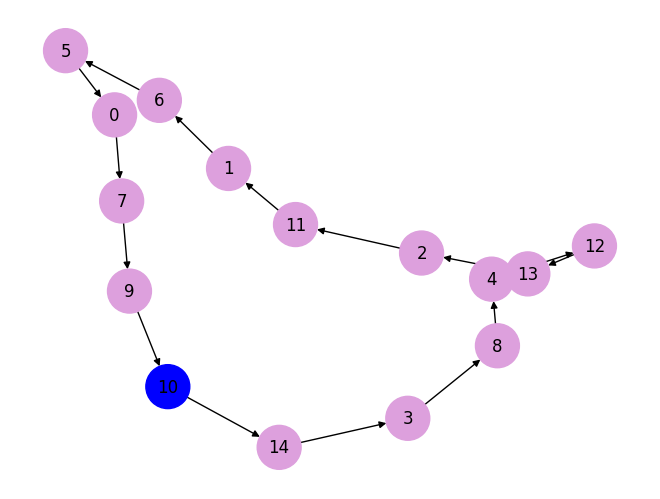

In [ ]:
import random
import numpy as np
import networkx as nx

# Noktaların veya şehirlerin koordinatları
Kordinat = np.array([[1, 2], [30, 21], [56, 23], [8, 18], [20, 50], [3, 4], [11, 6], [6, 7], [15, 20], [10, 9], [12, 12], [46, 17], [60, 55], [100, 80], [16, 13]])

# Verilen Koordinatlara dayalı ağırlıklı vir graifik için komşuluk matrisi
def MatrisUret(Kordinat):
    Matris = []
    for i in range(len(Kordinat)):
        for j in range(len(Kordinat)):
            p = np.linalg.norm(Kordinat[i] - Kordinat[j])
            Matris.append(p)
    Matris = np.reshape(Matris, (len(Kordinat), len(Kordinat)))
    print("***Oluşturulan Matris:***")
    print(Matris)
    return Matris

# Rastgele Çözüm Bul
def Cozum(Matris):
    Noktalar = list(range(0, len(Matris)))
    Cozum = []
    for i in range(0, len(Matris)):
        RastgeleNokta = Noktalar[random.randint(0, len(Noktalar) - 1)]
        Cozum.append(RastgeleNokta)
        Noktalar.remove(RastgeleNokta)
    return Cozum

# Yolu rastgele Çözüme göre hesaplar
def YolUzunlugu(Matris, Cozum):
    DonguUzunlugu = 0
    for i in range(0, len(Cozum)):
        DonguUzunlugu += Matris[Cozum[i], Cozum[i - 1]]
    return DonguUzunlugu

# Noktaları değiştirerek rastgeke çözüm komşuları oluştur ve en iyi komşuyu döndür
def Komsular(Matris, Cozum):
    Komsular = []
    for i in range(len(Cozum)):
        for j in range(i + 1, len(Cozum)):
            Komsu = Cozum.copy()
            Komsu[i] = Cozum[j]
            Komsu[j] = Cozum[i]
            Komsular.append(Komsu)
    # listedeki ilk komşunun en iyi komşu olduğunu varsay
    EnIyiKomsu = Komsular[0]
    EnIyiYol = YolUzunlugu(Matris, EnIyiKomsu)
    # daha iyi komşunun en iyi komşu olduğunu varsay
    for Komsu in Komsular:
        MevcutYol = YolUzunlugu(Matris, Komsu)
        if MevcutYol < EnIyiYol:
            EnIyiYol = MevcutYol
            EnIyiKomsu = Komsu
    return EnIyiKomsu, EnIyiYol

def TepeTırmanma(Kordinat):
    Matris = MatrisUret(Kordinat)

    MevcutCozum = Cozum(Matris)
    MevcutYol = YolUzunlugu(Matris, MevcutCozum)
    Komsu = Komsular(Matris, MevcutCozum)[0]
    EnIyiKomsu, EnIyiKomsu_path = Komsular(Matris, Komsu)

    while EnIyiKomsu_path < MevcutYol:
        MevcutCozum = EnIyiKomsu
        MevcutYol = EnIyiKomsu_path
        Komsu = Komsular(Matris, MevcutCozum)[0]
        EnIyiKomsu, EnIyiKomsu_path = Komsular(Matris, Komsu)
    return MevcutYol, MevcutCozum

def Graf(Kordinat):
    SonCozum = TepeTırmanma(Kordinat)
    G = nx.DiGraph()
    Gecici = SonCozum[1]
    G.add_nodes_from(SonCozum[1])

    for i in range(1, len(SonCozum[1])):
        G.add_edge(Gecici[i - 1], Gecici[i])
    G.add_edge(Gecici[len(Gecici) - 1], Gecici[0])

    RenkliHarita = []
    for Dugum in G:
        if Dugum == SonCozum[1][0]:
            RenkliHarita.append('blue')
        else:
            RenkliHarita.append('plum')

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=RenkliHarita, node_size=1000)
    print("Bulunan Çözüm:\n", SonCozum[0])
    return

Graf(Kordinat)
